#Jose Andres Henao Alzate
#CC 1036686332

# Embedded ML - Lab 2.1: TensorFlow

In this lab you will learn the basics of one of the most developed and widely used ML libraries: TensorFlow. It implements many of the most important ML models and algorithms and has optimized back-ends for efficient execution on CPUs, GPUs, TPUs and other devices.

In this lab you are given some helper functions but you are expected to write most of the code and be able to explain it at a high level of abstraction and also to modify any part of it. This lab is important because a significant part of the course will use TensorFlow.

### Learning outcomes


* Explain the basic concepts associated with TensorFlow
* Use the basic workflow of TensorFlow to build a simple ML model
* Implement simple dense networks with TensorFlow and Keras
* Use some of the input handling functions of TensorFlow
* Implement a simple CNN with TensorFlow and Keras
* Implement transfer learning and fine tuning.

### TensorFlow workflow
As in general with ML, in TensorFlow you have to get or preprocess the model inputs, train the model, run inference and evaluate results.

Here you should use TensorFlow to build a dense 4-layer network to classify items in the FASHION MNIST dataset. Explore a few different hidden-layer sizes and report the accuracy achieved.

Finally, investigate how to export the model to a file and write a separate code that is able to load that model and run inference again.

In [ ]:
!pip install tabulate


In [ ]:
#Liberys for implmentation.
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


from tensorflow.keras import layers, models
import tensorflow_hub as hub

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


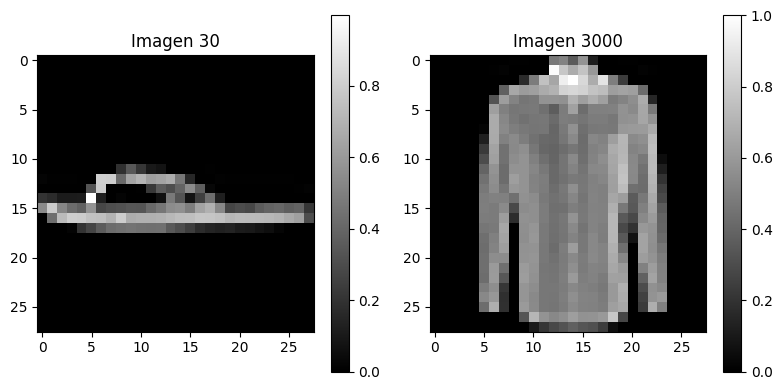

In [ ]:
# Pre-process input dataset
(train_images, train_labels),(test_images, test_labels)= (keras.datasets.fashion_mnist).load_data()

clases = [
    "Camiseta/top", "Pantalón", "Suéter", "Vestido", "Abrigo",
    "Sandalia", "Camisa", "Zapatilla deportiva", "Bolso", "Bota tobillo"
]

#Normalización de la imagen
train_images=train_images/255.0
test_images= test_images/255.0


plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(train_images[30], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.title("Imagen 30")

plt.subplot(1, 2, 2)
plt.imshow(train_images[3000], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.title("Imagen 3000")

plt.tight_layout()
plt.show()



In [ ]:
print(len(clases))

10


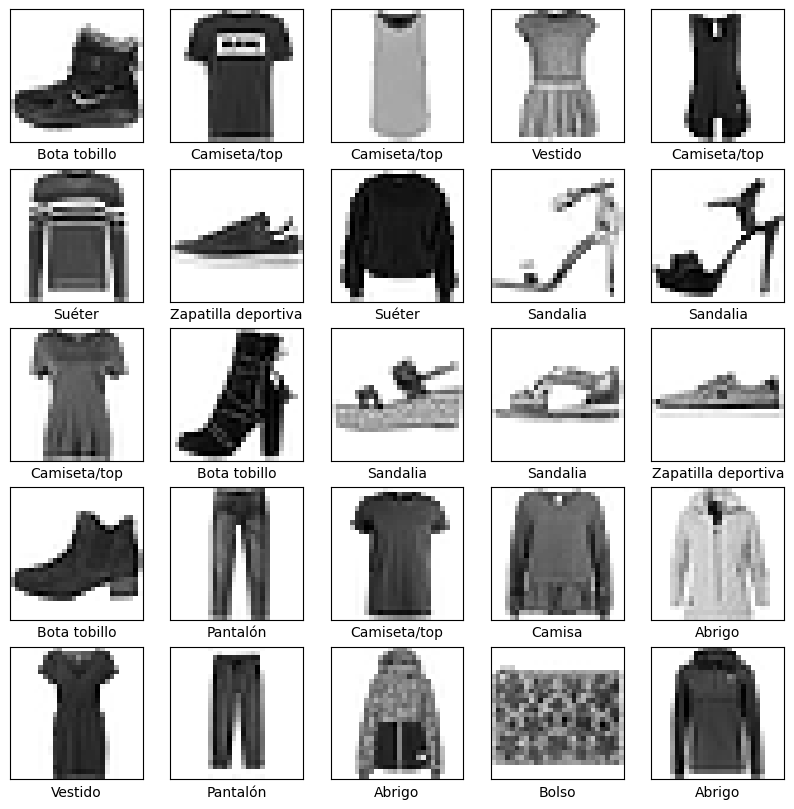

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(clases[train_labels[i]])
plt.show()

Teniendo el dataset listo, se procede con la implementación del modelo.

In [ ]:
# Create the model
models_neurons= [[10,20],[60,30],[40,10]]
#loss_models=[]
accuracy_models=[]

# I only make three diferents models, this models have been defined in models_neurons
for i in (models_neurons):
  print("parametros: {} ".format(i))
  model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(i[0], activation='relu'),
    keras.layers.Dense(i[1], activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ])
  # Compile the model
  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  # Train the model
  model.fit(train_images,train_labels,epochs=10)

  # Evaluate functional performance
  loss_function_test, accuracy_test= model.evaluate(test_images,test_labels,verbose=2)
  model.save("modelo_{}-{}.h5".format(i[0], i[1]))
  accuracy_models.append(accuracy_test)



parametros: [10, 20] 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6946 - loss: 0.8452
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8426 - loss: 0.4422
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8593 - loss: 0.3887
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8661 - loss: 0.3689
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8720 - loss: 0.3444
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8814 - loss: 0.3260
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8854 - loss: 0.3146
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8898 - loss: 0.2991
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8934 - loss: 0.2898
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8936 - loss: 0.2868
313/313 - 2s - 5ms/step - accuracy: 0.8724 - loss: 0.3582


parametros: [60, 30] 
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7583 - loss: 0.7003
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8556 - loss: 0.3985
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8688 - loss: 0.3572
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8765 - loss: 0.3306
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8854 - loss: 0.3090
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8901 - loss: 0.2982
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8971 - loss: 0.2806
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8965 - loss: 0.2778
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9019 - loss: 0.2602
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9018 - loss: 0.2629
313/313 - 1s - 5ms/step - accuracy: 0.8665 - loss: 0.3721


parametros: [40, 10] 
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7045 - loss: 0.8485
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8516 - loss: 0.4192
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8648 - loss: 0.3697
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8724 - loss: 0.3446
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8797 - loss: 0.3240
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8867 - loss: 0.3063
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8871 - loss: 0.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8924 - loss: 0.2917
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8957 - loss: 0.2808
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8971 - loss: 0.2751
313/313 - 2s - 5ms/step - accuracy: 0.8685 - loss: 0.3712


*Resultados en el accuracy de los modelos probados.*

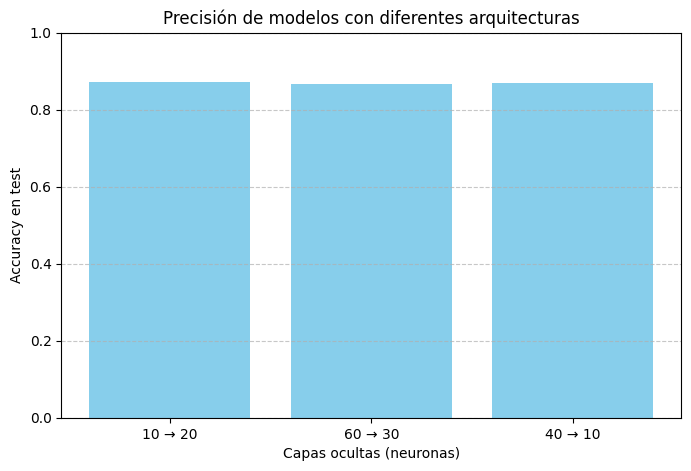

In [ ]:
labels = [' → '.join(map(str, layers)) for layers in models_neurons]

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracy_models, color='skyblue')
plt.ylim(0, 1)
plt.title('Precisión de modelos con diferentes arquitecturas')
plt.xlabel('Capas ocultas (neuronas)')
plt.ylabel('Accuracy en test')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Debido a que las diferentes arquitecturas dieron accuracys altos, se procede a trabajar con la de [10,20] neuronas en la capa oculta. Lo anterior debido a que esta tiene un accuracy casi igual a las demás arquitecturas y es menos costosa en términos de almacenamiento.

* La siguiente función se encarga de cargar y hacer inferencia sobre un modelo guardado en un archivo.

In [ ]:
def cargar_y_predecir(path_model, count_image):
    acierto=0
    # load model from file
    modelo = tf.keras.models.load_model(path_model)

    # Cargar datos de prueba
    (_, _), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
    x_test = x_test / 255.0  # Normalización
    x_test = np.expand_dims(x_test, -1)  # Expandir dimensión si el modelo lo requiere

    # make predictions
    predicciones = modelo.predict(x_test[:count_image])

    # Clases of dataset Fashion MNIST
    clases = [
    "Camiseta/top", "Pantalón", "Suéter", "Vestido", "Abrigo",
    "Sandalia", "Camisa", "Zapatilla deportiva", "Bolso", "Bota tobillo"
    ]

    # show results
    plt.figure(figsize=(10, 10))
    for i in range(count_image):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_test[i], cmap=plt.cm.binary)
        etiqueta_real = clases[y_test[i]]
        predicha = clases[np.argmax(predicciones[i])]
        if(predicha==etiqueta_real):
          acierto+=1
        plt.xlabel(f'Real: {etiqueta_real}\nPred: {predicha}', fontsize=8)
    plt.tight_layout()
    plt.show()
    print("El sistema en inferencia con {} imagenes tuvo un accuracy de: {:.3f}, y solo se equivocó en: {} imagenes".format(count_image,acierto/count_image,count_image-acierto))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


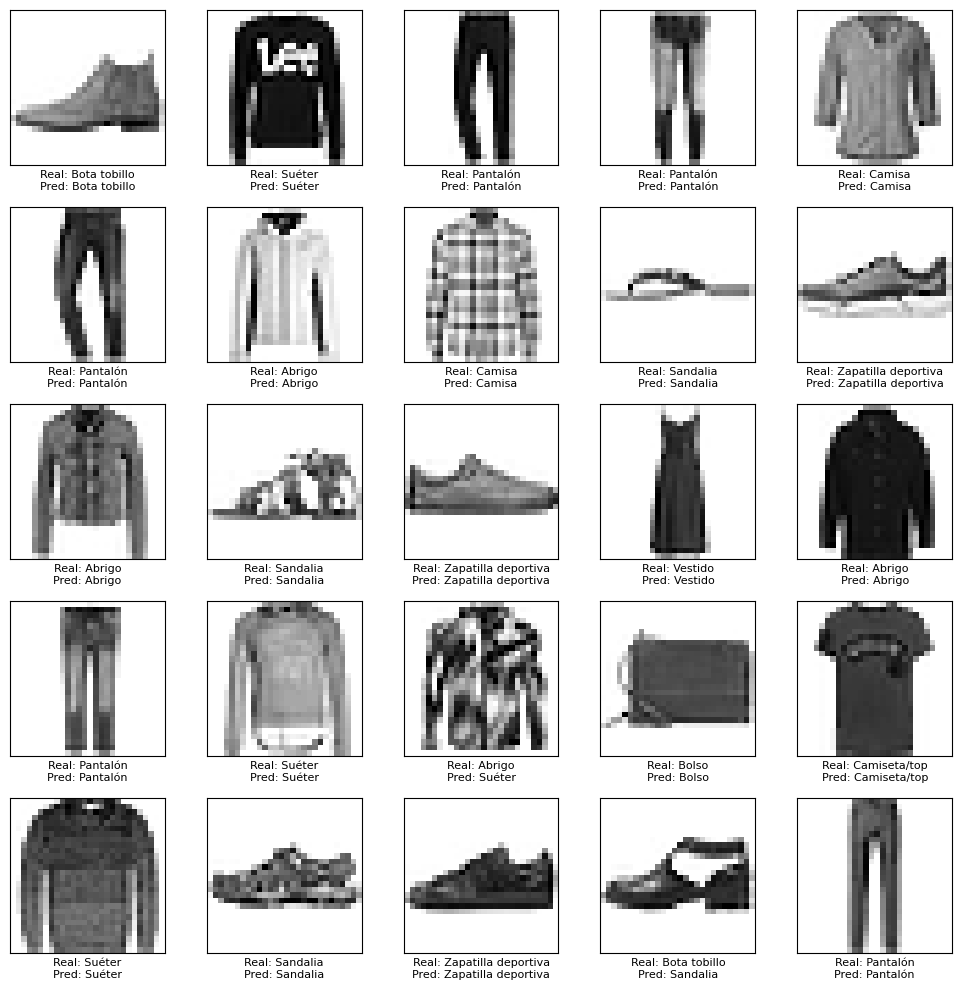

El sistema en inferencia con 25 imagenes tuvo un accuracy de: 0.920, y solo se equivocó en: 2 imagenes


In [ ]:
cargar_y_predecir('/content/modelo_10-20.h5',25)

### CNNs with TensorFlow
Convolutional Neural Networks add another type of processing layers to extract image features that allow the model to indentify patterns for a much better accuracy results in computer vision applications.

Implement a CNN model to classify the FASHION MNIST dataset and compare the accuracy results with the previous dense model. Also report a comparison of the model size measuring the saved model file size and through an analytical estimation.

In [ ]:
# Pre-process input dataset


# Create the CNN model
CNN_model = keras.Sequential([
    keras.layers.Conv2D(10, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the CNN model
CNN_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the model
CNN_model.fit(train_images,train_labels,epochs=10)
_, accuracy_test_CNN= CNN_model.evaluate(test_images,test_labels,verbose=2)
#model.save("CCmodelo_{}-{}.h5".format(i[0], i[1]))
CNN_model.save("CNN_model.h5")
# Evaluate functional performance

# Save the model to a file

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6639 - loss: 0.9353
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8371 - loss: 0.4688
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8644 - loss: 0.3939
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8727 - loss: 0.3651
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8818 - loss: 0.3368
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8874 - loss: 0.3299
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8918 - loss: 0.3109
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8963 - loss: 0.2977
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8962 - loss: 0.2958
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8984 - loss: 0.2889
313/313 - 2s - 5ms/step - accuracy: 0.8781 - loss: 0.3419


Teniendo el modelo de la CNN en un archivo, se procede con inferencia de este para el mismo conjunto de datos de la red neuronal densa.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


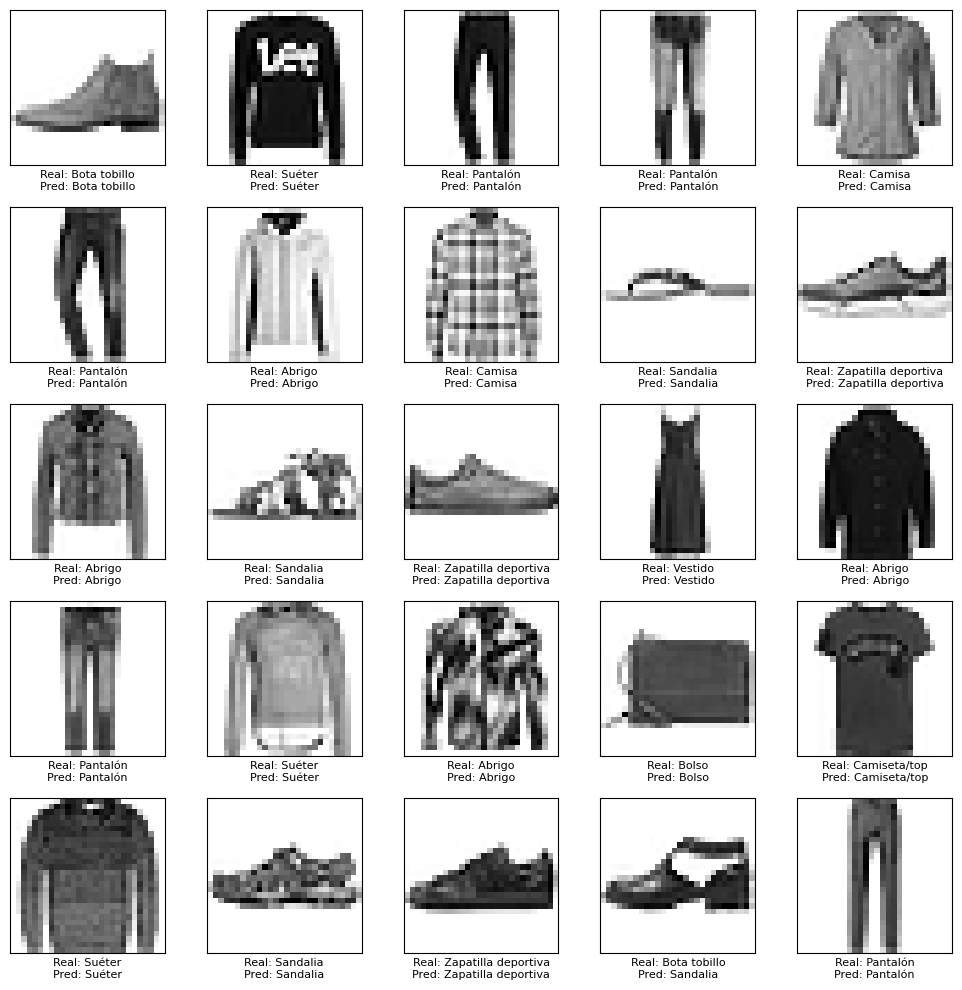

El sistema en inferencia con 25 imagenes tuvo un accuracy de: 0.960, y solo se equivocó en: 1 imagenes


In [ ]:
cargar_y_predecir('/content/CNN_model.h5',25)

###Medidas de los modelos en KB.

In [ ]:

def graficar_tamano_y_accuracy(ruta1, ruta2):
    nombre1 = os.path.basename(ruta1)
    nombre2 = os.path.basename(ruta2)

    tamano1 = os.path.getsize(ruta1) / 1024  # Tamaño en KB
    tamano2 = os.path.getsize(ruta2) / 1024  # Tamaño en KB

    accuracy1 = 0.960
    accuracy2 = 0.920

    print(f"Tamaño de {nombre1}: {tamano1:.2f} KB")
    print(f"Tamaño de {nombre2}: {tamano2:.2f} KB")
    print(f"Accuracy de {nombre1}: {accuracy1}")
    print(f"Accuracy de {nombre2}: {accuracy2}")

    nombres = []
    nombres.append(nombre1)
    nombres.append(nombre2)

    tamanos = []
    tamanos.append(tamano1)
    tamanos.append(tamano2)

    accuracies = []
    accuracies.append(accuracy1)
    accuracies.append(accuracy2)

    x = range(len(nombres))
    ancho = 0.35

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Barras de tamaño
    barras_tamano = ax1.bar(
        [i - ancho/2 for i in x], tamanos, width=ancho,
        color='royalblue', edgecolor='black', alpha=0.8, label='Tamaño (KB)'
    )
    ax1.set_ylabel('Tamaño del modelo (KB)', fontsize=11)
    ax1.set_ylim(0, max(tamanos) * 1.4)
    ax1.set_xticks(x)
    ax1.set_xticklabels(nombres, rotation=15)
    ax1.grid(axis='y', linestyle='--', alpha=0.6)

    # Barras de accuracy
    ax2 = ax1.twinx()
    barras_accuracy = ax2.bar(
        [i + ancho/2 for i in x], accuracies, width=ancho,
        color='mediumseagreen', edgecolor='black', alpha=0.8, label='Accuracy'
    )
    ax2.set_ylabel('Precisión del modelo (accuracy)', fontsize=11)
    ax2.set_ylim(0, 1.05)
    ax2.grid(axis='y', linestyle='--', alpha=0.4)

    # Añadir valores encima de las barras
    for i in range(len(nombres)):
        ax1.text(i - ancho/2, tamanos[i] + 5, f"{tamanos[i]:.1f}", ha='center', fontsize=9)
        ax2.text(i + ancho/2, accuracies[i] + 0.02, f"{accuracies[i]:.2f}", ha='center', fontsize=9)

    # Leyenda combinada
    fig.legend(
        [barras_tamano[0], barras_accuracy[0]],
        ['Tamaño del modelo (KB)', 'Accuracy del modelo en inferencia'],
        loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, fontsize=10
    )

    plt.title('Comparación de Modelos: Tamaño y Precisión', fontsize=13)
    plt.tight_layout()
    plt.show()

Tamaño de CNN_model.h5: 234.21 KB
Tamaño de modelo_10-20.h5: 507.80 KB
Accuracy de CNN_model.h5: 0.96
Accuracy de modelo_10-20.h5: 0.92


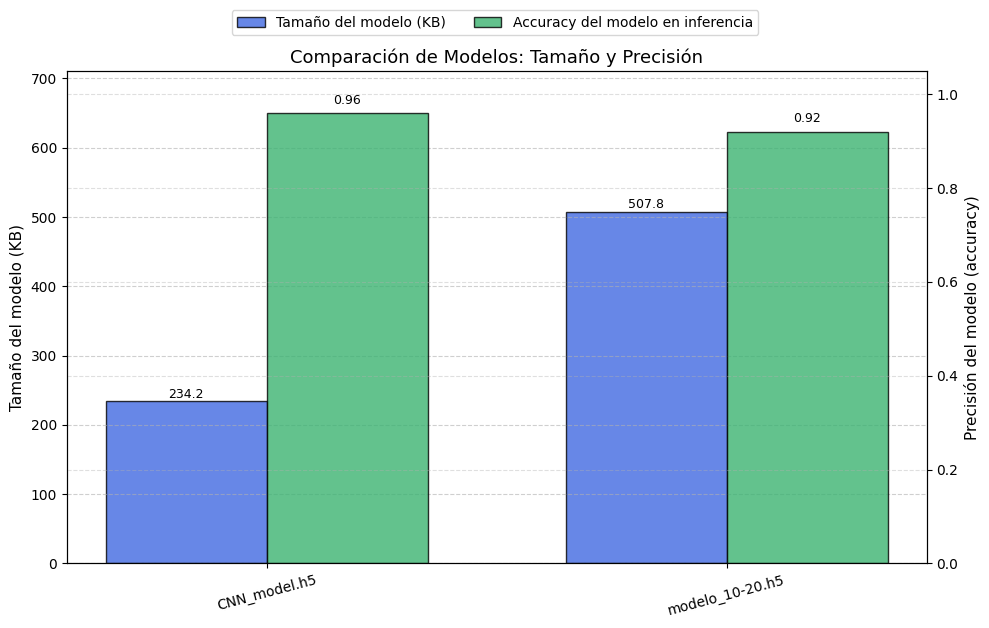

In [ ]:
graficar_tamano_y_accuracy("CNN_model.h5", "modelo_10-20.h5")


# Análisis del Costo de Almacenamiento

## Red Neuronal Densa (Fully Connected)

**Supuestos:**
- Cada peso y cada sesgo ocupan 4 bytes (`float32`).
- Las funciones de activación no se almacenan, ya que no son parámetros entrenables.

**Cálculo por capa:**

1. **Primera capa:**
   - Entradas: 784
   - Neuronas: 50  
   - Pesos: 784 × 50 = 39.200  
   - Sesgos: 50  
   - Total de parámetros: 39.250  
   - Espacio ocupado: 39.250 × 4 = 157.000 bytes

2. **Segunda capa:**
   - Entradas: 50  
   - Neuronas: 10  
   - Pesos: 50 × 10 = 500  
   - Sesgos: 10  
   - Total de parámetros: 510  
   - Espacio ocupado: 510 × 4 = 2.040 bytes

3. **Tercera capa:**
   - Entradas: 10  
   - Neuronas: 20  
   - Pesos: 10 × 20 = 200  
   - Sesgos: 20  
   - Total de parámetros: 220  
   - Espacio ocupado: 220 × 4 = 880 bytes

4. **Cuarta capa:**
   - Entradas: 20  
   - Neuronas: 10  
   - Pesos: 20 × 10 = 200  
   - Sesgos: 10  
   - Total de parámetros: 210  
   - Espacio ocupado: 210 × 4 = 840 bytes

**Total almacenamiento red densa:**
- Parámetros totales: 39.250 + 510 + 220 + 210 = 40.190  
- Espacio total: 40.190 × 4 = 160.760 bytes

---

## Red Neuronal Convolucional (CNN)

**Supuestos:**
- Cada peso y sesgo ocupa 4 bytes.
- Las capas MaxPooling y Flatten no tienen parámetros entrenables.

**Cálculo por capa:**

1. **Capa convolucional:**
   - Filtros: 10  
   - Tamaño del kernel: 3 × 3  
   - Canales de entrada: 1  
   - Pesos: 3 × 3 × 1 × 10 = 90  
   - Sesgos: 10  
   - Total de parámetros: 100  
   - Espacio ocupado: 100 × 4 = 400 bytes

2. **MaxPooling 2×2:**  
   - No contiene parámetros entrenables

3. **Flatten:**  
   - Salida de la convolución: 14 × 14 × 10 = 1.960  
   - No contiene parámetros entrenables

4. **Capa densa (10 neuronas):**
   - Entradas: 1.960  
   - Pesos: 1.960 × 10 = 19.600  
   - Sesgos: 10  
   - Total de parámetros: 19.610  
   - Espacio ocupado: 19.610 × 4 = 78.440 bytes

5. **Capa densa final (10 neuronas):**
   - Entradas: 10  
   - Pesos: 10 × 10 = 100  
   - Sesgos: 10  
   - Total de parámetros: 110  
   - Espacio ocupado: 110 × 4 = 440 bytes

**Total almacenamiento CNN:**
- Parámetros totales: 100 + 19.610 + 110 = 19.820  
- Espacio total: 19.820 × 4 = 79.280 bytes

---

## Comparación Final

| Modelo               | Parámetros totales | Almacenamiento (bytes) |
|----------------------|--------------------|-------------------------|
| Red Densa            | 40.190             | 160.760                 |
|CNN    | 19.820             | 79.280                  |


## Observación Comparativa

Un aspecto interesante en el análisis del sistema es la notable diferencia en el costo de almacenamiento entre la red neuronal densa y la red convolucional, a pesar de que ambas pueden ofrecer un buen desempeño en tareas similares.

Al calcular el cociente entre el almacenamiento requerido por la red densa y la CNN, se obtiene:

- Red Densa: 160.760 bytes  
- CNN: 79.280 bytes  

Por tanto, el cociente es:

160.760 / 79.280 ≈ **2.03**

Esto indica que, desde el punto de vista del almacenamiento de parámetros entrenables, la red densa ocupa aproximadamente **el doble de memoria** que la red convolucional. Este resultado es coherente con la estructura de cada arquitectura: la red convolucional reutiliza pesos mediante filtros compartidos y reduce dimensionalidad antes de llegar a las capas densas, mientras que la red completamente conectada requiere una gran cantidad de parámetros desde la primera capa.

Este análisis evidencia una gran ventaja en términos de eficiencia de almacenamiento en la CNN para el caso particular, no obstante, esto puede cambiar para otros contextos o problemas.


### Transfer learning and fine tuning
When you want to build a model but do not have enough data or resources to train a network with the accuracy you need, it possible to use a model that has been pre-trained on a large dataset and fine tune it with the target (smaller) dataset to solve the target classification problem.

Here you should use TensorFlow and Keras to download a pre-trained vision model from TensorFlow Hub (e.g. MobileNet V2), add a softmax classification layer and train it with a small subset of the Fashion MNIST dataset.

Compare runtimes and Top-1 accuracy of the resulting model with the dense and convolutional models previously built.



In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

# Cargar Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocesar los datos
train_images = np.expand_dims(train_images, axis=-1).astype("float32") / 255.0
test_images = np.expand_dims(test_images, axis=-1).astype("float32") / 255.0

# Convertir a tensores de tensorflow
train_images = tf.convert_to_tensor(train_images)
test_images = tf.convert_to_tensor(test_images)

# Crear un Dataset de TensorFlow para procesamiento por lotes
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

# Redimensionar por lotes
def resize_images(image, label):
    image_resized = tf.image.resize(image, (224, 224))  # Redimensionar imagen
    return image_resized, label

train_dataset = train_dataset.map(resize_images).batch(32)  # Procesar por lotes y redimensionar
test_dataset = test_dataset.map(resize_images).batch(32)

# Convertir a 3 canales (gris -> RGB)
def to_rgb(image, label):
    image_rgb = tf.repeat(image, 3, axis=-1)  # Convertir a 3 canales
    return image_rgb, label

train_dataset = train_dataset.map(to_rgb)
test_dataset = test_dataset.map(to_rgb)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

# Cargar el modelo preentrenado MobileNetV2 sin la capa de clasificación final
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Congelar las capas del modelo base para no entrenarlas
base_model.trainable = False

# Crear el modelo completo
pre_model = models.Sequential([
    base_model,  # Modelo preentrenado
    layers.GlobalAveragePooling2D(),  # Operación de agregación global
    layers.Dense(20, activation="relu"),  # Capa densa para la clasificación
    layers.Dense(10, activation="softmax")  # Capa final de clasificación (10 clases)
])

# Compilar el modelo
pre_model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Entrenar el modelo con el conjunto de datos preprocesado
pre_model.fit(train_dataset, epochs=10, validation_data=test_dataset)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_dataset)
pre_model.save("modelo_preentrenado.h5")

print(f"Test accuracy: {test_acc:.4f}")


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.8023 - loss: 0.5559 - val_accuracy: 0.8825 - val_loss: 0.3188
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.8912 - loss: 0.2986 - val_accuracy: 0.8903 - val_loss: 0.2962
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.9023 - loss: 0.2698 - val_accuracy: 0.8931 - val_loss: 0.2901
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.9087 - loss: 0.2527 - val_accuracy: 0.8936 - val_loss: 0.2910
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.9132 - loss: 0.2402 - val_accuracy: 0.8937 - val_loss: 0.2919
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 37ms/step - accuracy: 0.9166 - loss: 0.2303 - val_accuracy: 0.8938 - val_loss: 0.2918
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.9206 - loss: 0.2216 - val_accuracy: 0.8951 - val_loss: 0.2956
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.9234 -

Test accuracy: 0.1013


In [ ]:
import tensorflow as tf
import numpy as np
import time
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
from tabulate import tabulate

def comparar_modelos(ruta_denso, ruta_cnn, ruta_preentrenado):
    # Cargar Fashion MNIST
    (_, _), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
    test_images = test_images[:3000]  #
    test_labels = test_labels[:3000]

    # Preprocesamiento para modelo denso
    test_denso = test_images.reshape(-1, 28, 28).astype("float32") / 255.0

    # Preprocesamiento para modelo CNN
    test_cnn = test_images.reshape(-1, 28, 28, 1).astype("float32") / 255.0

    # Preprocesamiento para modelo preentrenado (RGB, tamaño 224x224)
    test_rgb = np.expand_dims(test_images, -1).astype("float32") / 255.0
    test_rgb = tf.image.resize(test_rgb, [224, 224])
    test_rgb = tf.repeat(test_rgb, 3, axis=-1).numpy()

    # Función para hacer inferencia y medir tiempo
    def inferencia(modelo, imagenes):
        inicio = time.time()
        predicciones = modelo.predict(imagenes, verbose=0)
        fin = time.time()
        tiempo = fin - inicio
        top1 = np.mean(np.argmax(predicciones, axis=1) == test_labels)
        return tiempo, top1

    # Cargar modelos
    modelo_denso = tf.keras.models.load_model(ruta_denso)
    modelo_cnn = tf.keras.models.load_model(ruta_cnn)
    modelo_pre = tf.keras.models.load_model(ruta_preentrenado, custom_objects={'KerasLayer': tf.keras.layers.Layer})

    # Inferencia y evaluación
    tiempo_denso, acc_denso = inferencia(modelo_denso, test_denso)
    tiempo_cnn, acc_cnn = inferencia(modelo_cnn, test_cnn)
    tiempo_pre, acc_pre = inferencia(modelo_pre, test_rgb)

    # Mostrar resultados con tabulate
    tabla = [
        ["Denso", f"{tiempo_denso:.4f} s", f"{acc_denso:.2%}"],
        ["CNN", f"{tiempo_cnn:.4f} s", f"{acc_cnn:.2%}"],
        ["Preentrenado (MobileNetV2)", f"{tiempo_pre:.4f} s", f"{acc_pre:.2%}"]
    ]
    print(tabulate(tabla, headers=["Modelo", "Tiempo de inferencia", "Top-1 Accuracy"], tablefmt="fancy_grid"))

# Uso
comparar_modelos("/content/modelo_10-20.h5", "/content/CNN_model.h5", "/content/modelo_preentrenado.h5")


╒════════════════════════════╤════════════════════════╤══════════════════╕
│ Modelo                     │ Tiempo de inferencia   │ Top-1 Accuracy   │
╞════════════════════════════╪════════════════════════╪══════════════════╡
│ Denso                      │ 0.7550 s               │ 87.67%           │
├────────────────────────────┼────────────────────────┼──────────────────┤
│ CNN                        │ 0.6312 s               │ 88.13%           │
├────────────────────────────┼────────────────────────┼──────────────────┤
│ Preentrenado (MobileNetV2) │ 13.7229 s              │ 89.70%           │
╘════════════════════════════╧════════════════════════╧══════════════════╛


### Discusión de resultados.

$Primera$ $parte$ ($Red$ $neuronal$ $Densa$)





Partiendo de conocimientos previos sobre la implementación de redes neuronales, se procedió a desarrollar una utilizando la librería TensorFlow, la cual facilita este proceso mediante instrucciones más simples. En este caso, se evaluaron tres arquitecturas de redes neuronales densas, las cuales presentaron valores de accuracy muy similares tanto en entrenamiento como en inferencia, como se observa en el diagrama de barras que compara el rendimiento en las pruebas.

Debido a la similitud en el desempeño, se optó por seleccionar la arquitectura con menor cantidad de neuronas. Esta no solo ofrecía un alto nivel de precisión, sino que también resultaba más eficiente en términos de almacenamiento, al ser menos pesada que las demás.

Algo interesante e importante de resaltar, es la versatilidad prestada por el modelo almacenado en un archivo, puesto que, este presta versatilidad si se desea transmitir o enviar el modelo o si simplemente se desea entrenar en un equipo y ejecutar (inferencia) en otro con menos capacidad computacional.



$Segunda$ $parte$ ($Red$ $neuronal$ $Convolucional$)


Al implementar una red neuronal convolucional (CNN) y compararla con una red neuronal densa en términos de accuracy y costo computacional, se observó que ambas ofrecen un alto nivel de precisión. Sin embargo, el análisis matemático de la cantidad de parámetros, junto con la gráfica de almacenamiento en kilobytes (KB) frente al accuracy, reveló que la CNN requiere aproximadamente la mitad del espacio de almacenamiento que la red densa.

Esta diferencia puede explicarse por la naturaleza de las capas convolucionales y de max pooling, las cuales eliminan una gran cantidad de conexiones neuronales que sí están presentes en las redes densas, haciendo que estas últimas sean más costosas de almacenar.


En cuanto al tiempo de inferencia, la red densa resultó ser más rápida: al procesar 3.000 imágenes utilizando una GPU, la CNN tardó paroximadamente 0.1 segundos más. Aunque esta diferencia puede ser irrelevante en muchas aplicaciones, en contextos donde el tiempo es un factor crítico, este tiempo adicional podría representar una desventaja significativa (como en inferencias con volumenes de datos muy grandes).



$Tercera$ $parte$ ($Red$ $neuronal$ $Pre-entredada$)

La red preentrenada utilizada en este caso mostró un buen desempeño, alcanzando un top-1 accuracy del 89.70%, lo cual es adecuado para diversas aplicaciones. Además, este tipo de redes resulta especialmente útil cuando se dispone de poca información o capacidad computacional, ya que permiten realizar inferencias con menos recursos y ofrecen mayor versatilidad.

Sin embargo, al tratarse de un modelo preentrenado, se tiene un control limitado sobre su arquitectura interna. Esta falta de flexibilidad puede implicar ciertos inconvenientes, como se evidencia en la tabla final: aunque esta red obtuvo una precisión ligeramente superior frente a otras arquitecturas, su tiempo de inferencia fue considerablemente mayor, alcanzando aproximadamente 13.72 segundos, mientras que las demás no superaron el segundo.
Este alto tiempo de procesamiento podría estar relacionado con el hecho de que la arquitectura MobileNet trabaja con imágenes en formato RGB, lo cual demanda mayor capacidad computacional.

En aplicaciones donde la velocidad de respuesta o el procesamiento de grandes volúmenes de datos en poco tiempo es fundamental, puede ser más conveniente utilizar arquitecturas diseñadas específicamente para ese propósito, incluso si no están preentrenadas. Esto permite una mejor optimización de los recursos computacionales y del tiempo de ejecución.

### Conclusiones.

* Optimización basada en precisión y almacenamiento:
A pesar de que las tres arquitecturas densas evaluadas presentaron un rendimiento similar en términos de accuracy, seleccionar aquella con menor cantidad de neuronas resultó beneficioso en cuanto a eficiencia de almacenamiento. Esto demuestra que es posible lograr modelos precisos sin comprometer los recursos computacionales, lo cual es esencial en entornos con restricciones de memoria o procesamiento.
* Ventajas estructurales de las CNN en almacenamiento:
Las redes neuronales convolucionales (CNN) ofrecen una alternativa eficiente frente a las redes densas, ya que reducen significativamente el número de parámetros gracias a sus capas de convolución y max pooling. Esta característica permite disminuir el tamaño del modelo sin perder precisión, lo que las convierte en una opción favorable cuando el almacenamiento es una limitación.
* Uso estratégico de redes preentrenadas:
Las redes preentrenadas, como MobileNet, proporcionan una gran ventaja cuando no se dispone de suficientes datos o poder computacional para entrenar desde cero. No obstante, su alta demanda de recursos durante la inferencia y el escaso control sobre su arquitectura interna deben considerarse cuidadosamente. En aplicaciones donde la velocidad es crítica, podría ser preferible optar por modelos personalizados más ligeros y optimizados para el entorno específico de implementación.
